In [4]:
from google.colab import files
uploaded = files.upload()


Saving AAPL_stock_data.csv to AAPL_stock_data.csv


In [15]:
import pandas as pd

df_raw = pd.read_csv("AAPL_stock_data.csv", header=None)
df_raw.head(10)  # Show first 10 rows to check structure



,0,1,2,3,4,5
0,Price,Close,High,Low,Open,Volume
1,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
2,Date,NaN,NaN,NaN,NaN,NaN
3,2018-01-02,40.42681884765625,40.43620824884917,39.722764160494656,39.933982715247524,102223600
4,2018-01-03,40.4197883605957,40.96425916920155,40.356426001755686,40.49019456253724,118071600
5,2018-01-04,40.6075325012207,40.71079444172855,40.3845825374921,40.49253559819918,89738400
6,2018-01-05,41.069854736328125,41.156686997562645,40.612219928324755,40.703746889925426,94640000
7,2018-01-08,40.91731643676758,41.21301814104045,40.818745621002336,40.91731643676758,82271200
8,2018-01-09,40.91262435913086,41.08394335569417,40.69671465281637,40.964255330315616,86336000
9,2018-01-10,40.90324020385742,40.90558934530854,40.60049818035278,40.638048633487585,95839600


In [17]:
print(df.columns)



Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], dtype='object')


In [18]:
import pandas as pd

# Skip first 2 rows to get proper headers
df = pd.read_csv("AAPL_stock_data.csv", header=2)

# Rename columns if needed
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# Keep only 'Close' column and drop missing values
df = df[['Close']].dropna()
df = df.astype(float)

print(df.head())


                Close
Date                 
2018-01-02  40.426819
2018-01-03  40.419788
2018-01-04  40.607533
2018-01-05  41.069855
2018-01-08  40.917316


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 0.0312
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 7.1774e-04
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 4.7459e-04
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 4.4722e-04
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 4.8937e-04
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 4.6625e-04
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 4.2737e-04
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 4.4945e-04
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 4.0221e-04
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 3.9545e-04
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
LSTM MSE: 37.88


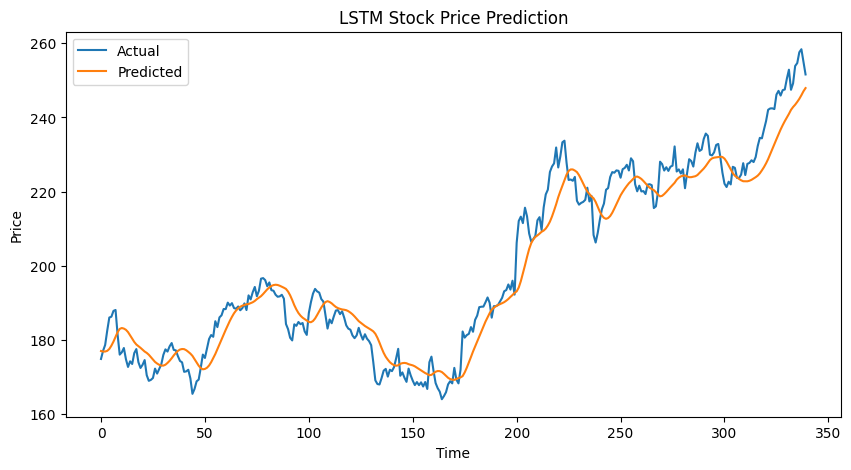

In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Normalize the 'Close' price
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# Split into train/test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict
predicted = model.predict(X_test)

# Reverse scaling
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate
mse_lstm = mean_squared_error(actual_prices, predicted_prices)
print(f"LSTM MSE: {mse_lstm:.2f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('LSTM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
